In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import pickle
import cv2
pickle_in = open("X_p3d.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_p3d.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

y=np.array(y)

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\f

In [2]:
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


In [4]:
from tensorflow.keras.models import Sequential

In [5]:
X= X.reshape(X.shape[0], 30, 30, -1, 1)

In [7]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
## input layer
input_layer = Input((30, 30,16, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu')(conv_layer1)

## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
conv_layer4 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(conv_layer3)
pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer2 = BatchNormalization()(pooling_layer2)
flatten_layer = Flatten()(pooling_layer2)

## create an MLP architecture with dense layers : 4096 -> 512 -> 10
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=3146, activation='softmax')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 30, 16, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 28, 28, 14, 8)     224       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 26, 26, 12, 16)    3472      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 13, 13, 6, 16)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 11, 11, 4, 32)     13856     
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 9, 9, 2, 64)       55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 4, 4, 1, 64)       0         
__________

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy','sparse_top_k_categorical_accuracy'])
history=model.fit(X_train, y_train, batch_size=16, epochs=150, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25445 samples, validate on 10906 samples
Epoch 1/150
25445/25445 [==============================] - 26s 1ms/step - loss: 8.0560 - acc: 5.8951e-04 - sparse_top_k_categorical_accuracy: 0.0020 - val_loss: 8.0542 - val_acc: 0.0025 - val_sparse_top_k_categorical_accuracy: 0.0041
Epoch 2/150
25445/25445 [==============================] - 21s 824us/step - loss: 8.0500 - acc: 0.0027 - sparse_top_k_categorical_accuracy: 0.0043 - val_loss: 8.0453 - val_acc: 0.0025 - val_sparse_top_k_categorical_accuracy: 0.0036
Epoch 3/150
25445/25445 [==============================] - 21s 825us/step - loss: 8.0399 - acc: 0.0027 - sparse_top_k_categorical_accuracy: 0.0041 - val_loss: 8.0429 - val_acc: 0.0025 - val_sparse_top_k_categorical_accuracy: 0.0041
Epoch 4/150
25445/25445 [==============================] - 21s 822us/step - loss: 8.0320 - acc: 0.0027 - sparse_top_k_categorical_accuracy: 0.0044 - val_loss: 8.0389 - val_acc: 0.0025 - val_sparse_top_k_c

Epoch 35/150
25445/25445 [==============================] - 21s 825us/step - loss: 0.1597 - acc: 0.9490 - sparse_top_k_categorical_accuracy: 0.9983 - val_loss: 0.4405 - val_acc: 0.8864 - val_sparse_top_k_categorical_accuracy: 0.9751
Epoch 36/150
25445/25445 [==============================] - 21s 825us/step - loss: 0.1373 - acc: 0.9580 - sparse_top_k_categorical_accuracy: 0.9986 - val_loss: 0.3862 - val_acc: 0.9072 - val_sparse_top_k_categorical_accuracy: 0.9770
Epoch 37/150
25445/25445 [==============================] - 21s 824us/step - loss: 0.1407 - acc: 0.9564 - sparse_top_k_categorical_accuracy: 0.9986 - val_loss: 0.4387 - val_acc: 0.8924 - val_sparse_top_k_categorical_accuracy: 0.9730
Epoch 38/150
25445/25445 [==============================] - 21s 824us/step - loss: 0.1363 - acc: 0.9576 - sparse_top_k_categorical_accuracy: 0.9990 - val_loss: 0.4023 - val_acc: 0.8987 - val_sparse_top_k_categorical_accuracy: 0.9795
Epoch 39/150
25445/25445 [==============================] - 21s 824u

25445/25445 [==============================] - 21s 821us/step - loss: 0.0537 - acc: 0.9827 - sparse_top_k_categorical_accuracy: 0.9998 - val_loss: 0.3137 - val_acc: 0.9278 - val_sparse_top_k_categorical_accuracy: 0.9841
Epoch 71/150
25445/25445 [==============================] - 21s 822us/step - loss: 0.0502 - acc: 0.9836 - sparse_top_k_categorical_accuracy: 0.9997 - val_loss: 0.3333 - val_acc: 0.9246 - val_sparse_top_k_categorical_accuracy: 0.9818
Epoch 72/150
25445/25445 [==============================] - 21s 821us/step - loss: 0.0493 - acc: 0.9850 - sparse_top_k_categorical_accuracy: 0.9999 - val_loss: 0.3240 - val_acc: 0.9272 - val_sparse_top_k_categorical_accuracy: 0.9813
Epoch 73/150
25445/25445 [==============================] - 21s 821us/step - loss: 0.0455 - acc: 0.9855 - sparse_top_k_categorical_accuracy: 0.9998 - val_loss: 0.3239 - val_acc: 0.9257 - val_sparse_top_k_categorical_accuracy: 0.9839
Epoch 74/150
25445/25445 [==============================] - 21s 825us/step - loss

25445/25445 [==============================] - 21s 822us/step - loss: 0.0296 - acc: 0.9904 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.3056 - val_acc: 0.9323 - val_sparse_top_k_categorical_accuracy: 0.9841
Epoch 106/150
25445/25445 [==============================] - 21s 822us/step - loss: 0.0335 - acc: 0.9892 - sparse_top_k_categorical_accuracy: 0.9999 - val_loss: 0.2880 - val_acc: 0.9366 - val_sparse_top_k_categorical_accuracy: 0.9849
Epoch 107/150
25445/25445 [==============================] - 21s 823us/step - loss: 0.0321 - acc: 0.9902 - sparse_top_k_categorical_accuracy: 0.9998 - val_loss: 0.2979 - val_acc: 0.9351 - val_sparse_top_k_categorical_accuracy: 0.9848
Epoch 108/150
25445/25445 [==============================] - 21s 822us/step - loss: 0.0301 - acc: 0.9899 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.3119 - val_acc: 0.9315 - val_sparse_top_k_categorical_accuracy: 0.9850
Epoch 109/150
25445/25445 [==============================] - 21s 820us/step - 

25445/25445 [==============================] - 21s 832us/step - loss: 0.0226 - acc: 0.9930 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.2874 - val_acc: 0.9375 - val_sparse_top_k_categorical_accuracy: 0.9855
Epoch 141/150
25445/25445 [==============================] - 21s 833us/step - loss: 0.0250 - acc: 0.9917 - sparse_top_k_categorical_accuracy: 0.9998 - val_loss: 0.2899 - val_acc: 0.9375 - val_sparse_top_k_categorical_accuracy: 0.9859
Epoch 142/150
25445/25445 [==============================] - 21s 822us/step - loss: 0.0200 - acc: 0.9932 - sparse_top_k_categorical_accuracy: 0.9999 - val_loss: 0.3217 - val_acc: 0.9320 - val_sparse_top_k_categorical_accuracy: 0.9851
Epoch 143/150
25445/25445 [==============================] - 21s 824us/step - loss: 0.0219 - acc: 0.9934 - sparse_top_k_categorical_accuracy: 1.0000 - val_loss: 0.2761 - val_acc: 0.9404 - val_sparse_top_k_categorical_accuracy: 0.9859
Epoch 144/150
25445/25445 [==============================] - 21s 823us/step - 

In [11]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_acc,val_sparse_top_k_categorical_accuracy,loss,acc,sparse_top_k_categorical_accuracy,epoch
145,0.277034,0.941959,0.985696,0.020769,0.993555,0.999921,145
146,0.279674,0.939391,0.986429,0.023932,0.992297,0.999843,146
147,0.277671,0.938749,0.985971,0.024946,0.991708,0.999882,147
148,0.274757,0.942050,0.987163,0.019782,0.993555,0.999961,148
149,0.324332,0.931872,0.983862,0.021218,0.993437,0.999921,149


In [12]:
# Generate generalization metrics
score = model.evaluate( X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.32433162617922245 / Test accuracy: 0.9318723637708366


In [13]:
y_pred = model.predict(X_test)
y_pred  = y_pred.argmax(axis=-1)

In [14]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred )
print('Confusion Matrix\n')
print(confusion)
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.5f}\n'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 4]]

Accuracy: 0.93187



In [15]:
print('Micro Precision: {:.5f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.5f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.5f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.5f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.5f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.5f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.5f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.5f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.5f}'.format(f1_score(y_test, y_pred, average='weighted')))

Micro Precision: 0.93187
Micro Recall: 0.93187
Micro F1-score: 0.93187

Macro Precision: 0.93628
Macro Recall: 0.93537
Macro F1-score: 0.92423

Weighted Precision: 0.95167
Weighted Recall: 0.93187
Weighted F1-score: 0.93160


C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [16]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.12      1.00      0.21         2
           4       0.00      0.00      0.00         4
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       0.50      1.00      0.67         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         4
   

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [17]:

import matplotlib.pyplot as plt


In [18]:
def plot_loss(history, title):
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()
    
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

<Figure size 720x360 with 0 Axes>

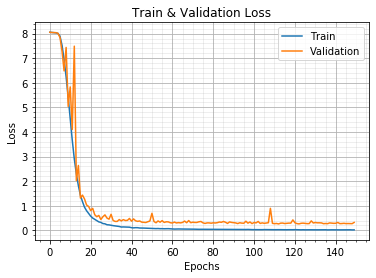

Minimum validation loss of 0.2633072810679097 reached at epoch 112


In [19]:
plot_loss(history, 'Train & Validation Loss')

In [20]:
def plot_acc(history, title):
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['acc'], label='Train')
    plt.plot(history.history['val_acc'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()
    
    val_acc = history.history['val_acc']
    max_idx = np.argmax(val_acc)
    max_val_acc = val_acc[max_idx]
    print('Maximum validation Acc of {} reached at epoch {}'.format(max_val_acc*100, max_idx))

In [21]:
def plot_kacc(history, title):
    plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(1, 1)  
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')
    plt.plot(history.history['sparse_top_k_categorical_accuracy'], label='Train')
    plt.plot(history.history['val_sparse_top_k_categorical_accuracy'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.show()
    


<Figure size 720x360 with 0 Axes>

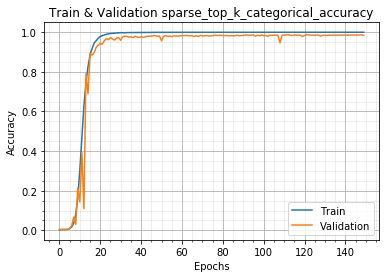

In [22]:
plot_kacc(history, 'Train & Validation sparse_top_k_categorical_accuracy')

<Figure size 720x360 with 0 Axes>

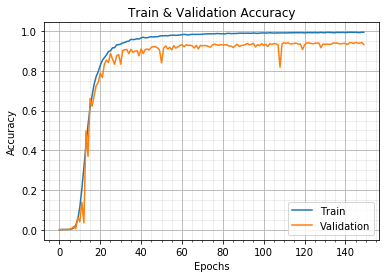

Maximum validation Acc of 94.20502475701448 reached at epoch 148


In [23]:
plot_acc(history, 'Train & Validation Accuracy')

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pickle
import numpy as np
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
num_classes=124
X = X/255.0

In [ ]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
batch_size = 32
num_classes = 125
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Sa_gait.h5'

In [ ]:
y=np.array(y)
y.shape

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=3
                             , verbose=0)
# Let's train the model using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# Fit the model on the batches generated by datagen.flow().
history=model.fit(X, y, batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.2, callbacks=[earlystopper])

In [ ]:
plot_loss(history, 'Train & Validation Loss')

In [ ]:
plot_acc(history, 'Train & Validation Acc')

In [ ]:
plot_kacc(history, 'Train & Validation Acc')

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Fit the model on the batches generated by datagen.flow().
history2=model.fit(X, y, batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.5)

In [ ]:
plot_loss(history2, 'SimpleNN - Train & Validation Loss')

In [ ]:
plot_acc(history2, 'SimpleNN - Train & Validation Acc')

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)